In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
g=nx.Graph()
g.graph["Graph_Name"] = "g"

In [3]:
g.add_node('V2')
g.add_node('V3')
g.add_node('V4')
g.add_node('V5')
g.add_node('V6')

g_data = {
    "V1" : [5,7,9,2],
    "V2" : [-5,3,-1,7],
    "V3" : [1,5,3,4],
    "V4" : [5,-3,2,6],
    "V5" : [3,4,6,7],
    "V6" : [-3,4,6,-2]
}

In [4]:
g.add_edges_from([
    ("V1","V5"),
    ("V5","V4"),
    ("V4","V2"),
    ("V2","V1"),
    ("V2","V3"),
    ("V3","V6"),
    ("V6","V4"),
])

In [5]:
pos={
    "V1":(0,4),
    "V2":(0,0),
    "V3":(2,2),
    "V4":(4,0),
    "V5":(4,5),
    "V6":(6,2), 
}

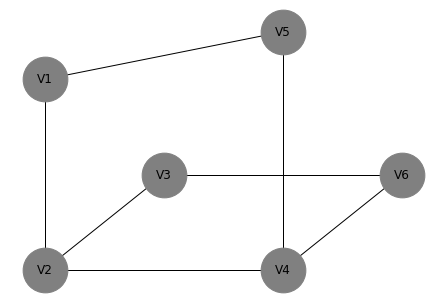

In [6]:
nx.draw(g,with_labels=True,pos = pos, node_color="grey", node_size=2000)

In [7]:
for val in g_data:
    print("for ", val)
    print("Data is ", g_data[val])

for  V1
Data is  [5, 7, 9, 2]
for  V2
Data is  [-5, 3, -1, 7]
for  V3
Data is  [1, 5, 3, 4]
for  V4
Data is  [5, -3, 2, 6]
for  V5
Data is  [3, 4, 6, 7]
for  V6
Data is  [-3, 4, 6, -2]


In [8]:
partition = [{"V1"}, {"V2"}, {"V4"}, {"V5"}, {"V3","V6"}]

In [9]:
G = nx.quotient_graph(g, partition, relabel=False)

In [10]:
mapping = {frozenset({'V1'}): 'V1', frozenset({'V2'}): 'V2', frozenset({'V3','V6'}): 'V3,V6', frozenset({'V4'}): 'V4', frozenset({'V5'}): 'V5'}

G=nx.relabel_nodes(G, mapping)

Npos={
    "V1":(0,4),
    "V2":(0,0),
    "V3,V6":(2,2),
    "V4":(4,0),
    "V5":(4,5),
}

In [11]:
dict = {}
for i in g_data:
  if i == "V3" or i == "V6":
    dict[i]=g_data[i]

sum=[]
V3V6 = []
for i in dict:
  sum.append(dict[i])
q =0
p=0
for i in sum:
  for j in i:
    if q < 4:
      V3V6.append(j)
      q=q+1
    else:
      V3V6[p]=(V3V6[p]+j)/2
      p=p+1

G_data = g_data.copy()
del G_data["V3"]
del G_data["V6"]
G_data["V3V6"]=V3V6

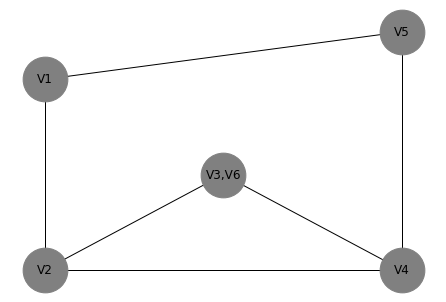

In [12]:
nx.draw(G,with_labels=True,pos = Npos, node_color="grey", node_size=2000)

In [13]:
for val in G_data:
    print("for ", val)
    print("Data is ", G_data[val])

for  V1
Data is  [5, 7, 9, 2]
for  V2
Data is  [-5, 3, -1, 7]
for  V4
Data is  [5, -3, 2, 6]
for  V5
Data is  [3, 4, 6, 7]
for  V3V6
Data is  [-1.0, 4.5, 4.5, 1.0]
